In [4]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\Roger09\Desktop\Data Analyst Portfolio Project\Python Project\movies.csv')

In [5]:
# Now let's take a look at the data
# Vamos a intentar averiguar la correlación entre budget and gross
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country      budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000.0   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000.0   
2              Leigh Brackett       Mark Hamill   United States  18000000.0   
3                Jim Abrahams       Robert Hays   United States   3500000.0   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000.0   
...                       ...               ...             ...         ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000.0   
7664              Lisa Huston  Michael Saquella   United States         NaN   
7665             Lynno Lovert      Onyama Laura   United States     58750.0   
7666            James Randall     Christina Roz   United States     15000.0   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         NaN   

            gross                    company  runtime  
0      46998772.0               Warner Bros.    146.0  
1      58853106.0          Columbia Pictures    104.0  
2     538375067.0                  Lucasfilm    124.0  
3      83453539.0         Paramount Pictures     88.0  
4      39846344.0             Orion Pictures     98.0  
...           ...                        ...      ...  
7663          NaN                        NaN     90.0  
7664          NaN  Cactus Blue Entertainment     90.0  
7665          NaN           Embi Productions      NaN  
7666          NaN                        NaN    120.0  
7667          NaN                PK 65 Films    102.0  

[7668 rows x 15 columns]

In [13]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [7]:
# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [10]:
# Eliminar los NaN de las columnas "budget" y "gross" 

df = df.dropna(subset=['budget', 'gross'])

In [11]:
# Change data type of columns

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [12]:
df

name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year                           released  score      votes  \
0     1980      June 13, 1980 (United States)    8.4   927000.0   
1     1980       July 2, 1980 (United States)    5.8    65000.0   
2     1980      June 20, 1980 (United States)    8.7  1200000.0   
3     1980       July 2, 1980 (United States)    7.7   221000.0   
4     1980      July 25, 1980 (United States)    7.3   108000.0   
...    ...                                ...    ...        ...   
7648  2020   January 17, 2020 (United States)    6.6   140000.0   
7649  2020  February 14, 2020 (United States)    6.5   102000.0   
7650  2020   January 17, 2020 (United States)    5.6    53000.0   
7651  2020  February 21, 2020 (United States)    6.8    42000.0   
7652  2020    August 28, 2020 (United States)    6.8     3700.0   

             director                   writer               star  \
0     Stanley Kubrick             Stephen King     Jack Nicholson   
1      Randal Kleiser  Henry De Vere Stacpoole     Brooke Shields   
2      Irvin Kershner           Leigh Brackett        Mark Hamill   
3        Jim Abrahams             Jim Abrahams        Robert Hays   
4        Harold Ramis       Brian Doyle-Murray        Chevy Chase   
...               ...                      ...                ...   
7648     Adil El Arbi              Peter Craig         Will Smith   
7649      Jeff Fowler                Pat Casey       Ben Schwartz   
7650   Stephen Gaghan           Stephen Gaghan  Robert Downey Jr.   
7651    Chris Sanders            Michael Green      Harrison Ford   
7652          Hu Guan                  Hu Guan    Zhi-zhong Huang   

             country     budget      gross  \
0     United Kingdom   19000000   46998772   
1      United States    4500000   58853106   
2      United States   18000000  538375067   
3      United States    3500000   83453539   
4      United States    6000000   39846344   
...              ...        ...        ...   
7648   United States   90000000  426505244   
7649   United States   85000000  319715683   
7650   United States  175000000  245487753   
7651          Canada  135000000  111105497   
7652           China   80000000  461421559   

                                  company  runtime  
0                            Warner Bros.    146.0  
1                       Columbia Pictures    104.0  
2                               Lucasfilm    124.0  
3                      Paramount Pictures     88.0  
4                          Orion Pictures     98.0  
...                                   ...      ...  
7648                    Columbia Pictures    124.0  
7649                   Paramount Pictures     99.0  
7650                   Universal Pictures    101.0  
7651                 20th Century Studios    100.0  
7652  Beijing Diqi Yinxiang Entertainment    149.0  

[5436 rows x 15 columns]

In [14]:
# Create correct Year Column

df['yearcorrect'] = df['released'].astype(str).str[:4]

df

name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year                           released  score      votes  \
0     1980      June 13, 1980 (United States)    8.4   927000.0   
1     1980       July 2, 1980 (United States)    5.8    65000.0   
2     1980      June 20, 1980 (United States)    8.7  1200000.0   
3     1980       July 2, 1980 (United States)    7.7   221000.0   
4     1980      July 25, 1980 (United States)    7.3   108000.0   
...    ...                                ...    ...        ...   
7648  2020   January 17, 2020 (United States)    6.6   140000.0   
7649  2020  February 14, 2020 (United States)    6.5   102000.0   
7650  2020   January 17, 2020 (United States)    5.6    53000.0   
7651  2020  February 21, 2020 (United States)    6.8    42000.0   
7652  2020    August 28, 2020 (United States)    6.8     3700.0   

             director                   writer               star  \
0     Stanley Kubrick             Stephen King     Jack Nicholson   
1      Randal Kleiser  Henry De Vere Stacpoole     Brooke Shields   
2      Irvin Kershner           Leigh Brackett        Mark Hamill   
3        Jim Abrahams             Jim Abrahams        Robert Hays   
4        Harold Ramis       Brian Doyle-Murray        Chevy Chase   
...               ...                      ...                ...   
7648     Adil El Arbi              Peter Craig         Will Smith   
7649      Jeff Fowler                Pat Casey       Ben Schwartz   
7650   Stephen Gaghan           Stephen Gaghan  Robert Downey Jr.   
7651    Chris Sanders            Michael Green      Harrison Ford   
7652          Hu Guan                  Hu Guan    Zhi-zhong Huang   

             country     budget      gross  \
0     United Kingdom   19000000   46998772   
1      United States    4500000   58853106   
2      United States   18000000  538375067   
3      United States    3500000   83453539   
4      United States    6000000   39846344   
...              ...        ...        ...   
7648   United States   90000000  426505244   
7649   United States   85000000  319715683   
7650   United States  175000000  245487753   
7651          Canada  135000000  111105497   
7652           China   80000000  461421559   

                                  company  runtime yearcorrect  
0                            Warner Bros.    146.0        June  
1                       Columbia Pictures    104.0        July  
2                               Lucasfilm    124.0        June  
3                      Paramount Pictures     88.0        July  
4                          Orion Pictures     98.0        July  
...                                   ...      ...         ...  
7648                    Columbia Pictures    124.0        Janu  
7649                   Paramount Pictures     99.0        Febr  
7650                   Universal Pictures    101.0        Janu  
7651                 20th Century Studios    100.0        Febr  
7652  Beijing Diqi Yinxiang Entertainment    149.0        Augu  

[5436 rows x 16 columns]

In [15]:
# ordenarán el DataFrame df por los valores de la columna 'gross' en orden descendente, 
# y los cambios se guardarán en el DataFrame original si se usa inplace=True, 
# o se almacenarán en una nueva variable si se usa inplace=False.

# Por lo tanto en este caso es para que nosotros veamos las peliculas que más generaron

df.sort_values(by=['gross'], inplace=False, ascending=False)

name     rating   genre  year  \
5445                                      Avatar      PG-13  Action  2009   
7445                           Avengers: Endgame      PG-13  Action  2019   
3045                                     Titanic      PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens      PG-13  Action  2015   
7244                      Avengers: Infinity War      PG-13  Action  2018   
...                                          ...        ...     ...   ...   
2434                  Philadelphia Experiment II      PG-13  Action  1993   
3681                                Ginger Snaps  Not Rated   Drama  2000   
272                                     Parasite          R  Horror  1982   
2417                                    Madadayo        NaN   Drama  1993   
3203                                  Trojan War      PG-13  Comedy  1997   

                               released  score      votes          director  \
5445  December 18, 2009 (United States)    7.8  1100000.0     James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0     Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0     James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0       J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0     Anthony Russo   
...                                 ...    ...        ...               ...   
2434         June 4, 1994 (South Korea)    4.5     1900.0  Stephen Cornwell   
3681              May 11, 2001 (Canada)    6.8    43000.0      John Fawcett   
272      March 12, 1982 (United States)    3.9     2300.0      Charles Band   
2417             April 17, 1993 (Japan)    7.3     5100.0    Akira Kurosawa   
3203           October 1, 1997 (Brazil)    5.7     5800.0      George Huang   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   
...                  ...                ...            ...        ...   
2434  Wallace C. Bennett       Brad Johnson  United States    5000000   
3681        Karen Walton      Emily Perkins         Canada    5000000   
272        Alan J. Adler    Robert Glaudini  United States     800000   
2417        Ishirô Honda   Tatsuo Matsumura          Japan   11900000   
3203           Andy Burg       Will Friedle  United States   15000000   

           gross                         company  runtime yearcorrect  
5445  2847246203           Twentieth Century Fox    162.0        Dece  
7445  2797501328                  Marvel Studios    181.0        Apri  
3045  2201647264           Twentieth Century Fox    194.0        Dece  
6663  2069521700                       Lucasfilm    138.0        Dece  
7244  2048359754                  Marvel Studios    149.0        Apri  
...          ...                             ...      ...         ...  
2434        2970                Trimark Pictures     97.0        June  
3681        2554       Copperheart Entertainment    108.0        May   
272         2270                Embassy Pictures     85.0        Marc  
2417         596  DENTSU Music And Entertainment    134.0        Apri  
3203         309                        Daybreak     85.0        Octo  

[5436 rows x 16 columns]

In [16]:
# Mucho más como de ver la información que tenemos
pd.set_option('display.max_row', None)

In [23]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [18]:
# Vamos a ver si hay duplicados en nuestra base
# Drop any duplicates

# Con está linea te muestra los valores unicos de la columna "company", Ejemplo

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
3698                              Zentropa Entertainments
1180                                 Zenith Entertainment
5180                                      Zazen Produções
1321                             Zanuck/Brown Productions
1329                          Zacharias-Buhai Productions
789                             Young Sung Production Co.
5125                           Young Hannibal Productions
5499                                          Yellow Bird
4618          

In [55]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime yearcorrect  Year  
5445  2847246203  Twentieth Century Fox    162.0        Dece  Dece  
7445  2797501328         Marvel Studios    181.0        Apri  Apri  
3045  2201647264  Twentieth Century Fox    194.0        Dece  Dece  
6663  2069521700              Lucasfilm    138.0        Dece  Dece  
7244  2048359754         Marvel Studios    149.0        Apri  Apri

In [20]:
# Hipotesis Inicales a comprobar "Guesses"
# Budget high correlation
# Company high correlation

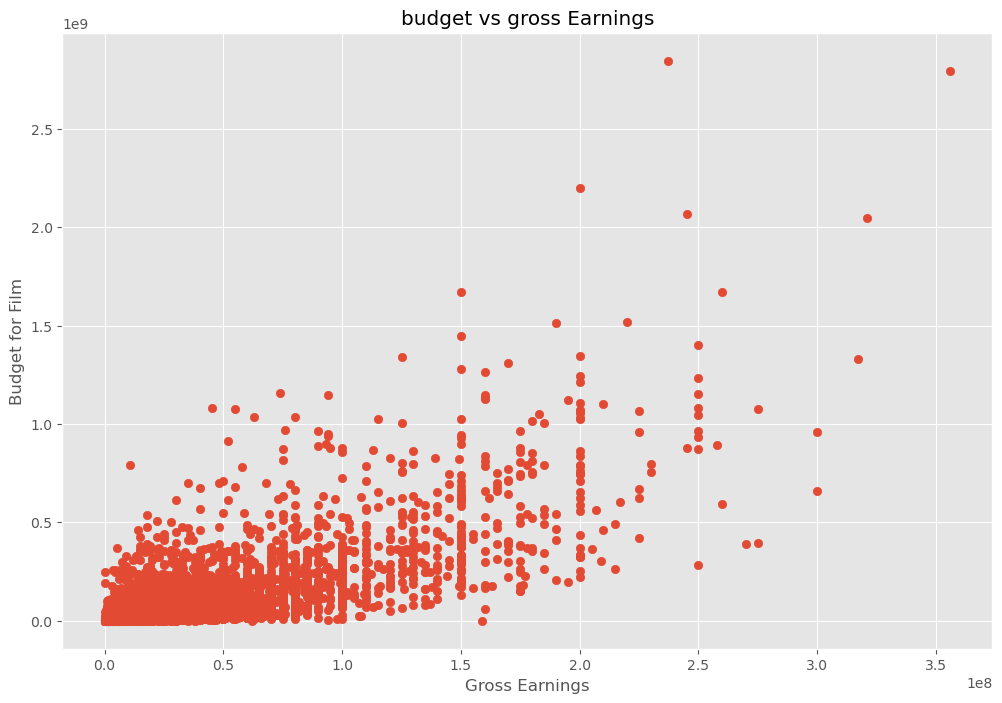

In [25]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('budget vs gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')

plt.show()

In [24]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime yearcorrect  
5445  2847246203  Twentieth Century Fox    162.0        Dece  
7445  2797501328         Marvel Studios    181.0        Apri  
3045  2201647264  Twentieth Century Fox    194.0        Dece  
6663  2069521700              Lucasfilm    138.0        Dece  
7244  2048359754         Marvel Studios    149.0        Apri

<Axes: xlabel='budget', ylabel='gross'>

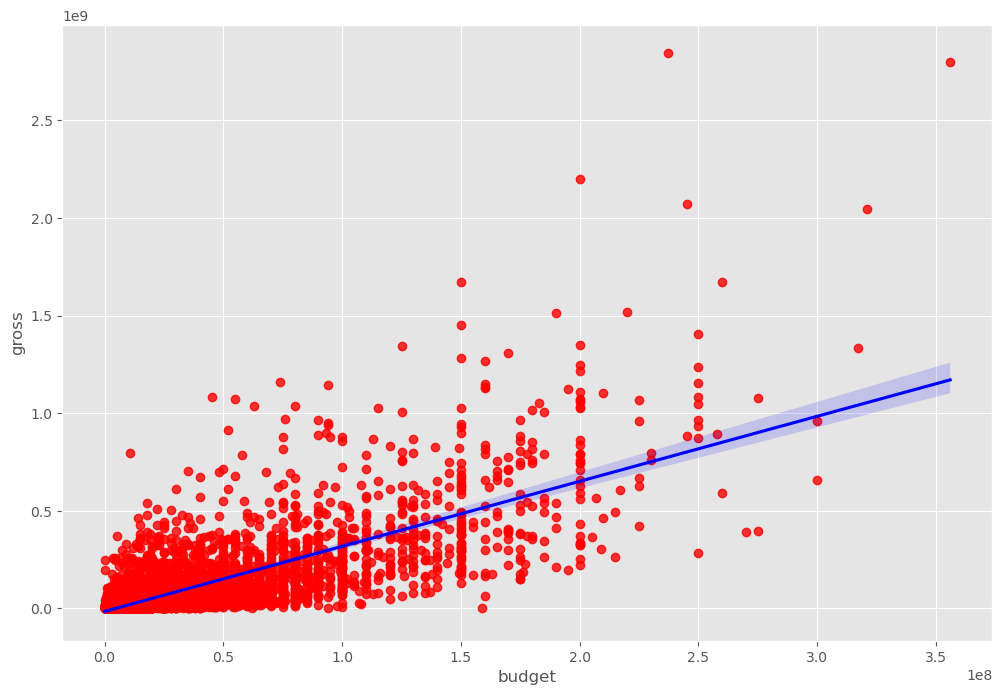

In [29]:
# Plot budget vs gross using seaborn

# Traza un gráfico de dispersión donde el eje x representa los valores de la columna 'budget', 
# el eje y representa los valores de la columna 'gross', y se ajusta una línea de regresión lineal que intenta 
# modelar la relación entre estas dos variables. Esto puede ser útil para visualizar la relación entre el presupuesto (budget) 
# y los ingresos brutos (gross) en un conjunto de datos.


sns.regplot(x="budget", y="gross", data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [30]:
# Lest's start looking at correlation

In [36]:
variables = ['budget', 'gross', 'runtime', 'score', 'votes', 'year']
df_subset = df[variables]
correlation_matrix = df_subset.corr(method='pearson')
print(correlation_matrix)

# Correlación --> person, kendall, spearman

           budget     gross   runtime     score     votes      year
budget   1.000000  0.740395  0.318595  0.071792  0.440021  0.327781
gross    0.740395  1.000000  0.275596  0.222143  0.614904  0.274264
runtime  0.318595  0.275596  1.000000  0.414580  0.352437  0.074203
score    0.071792  0.222143  0.414580  1.000000  0.473809  0.055174
votes    0.440021  0.614904  0.352437  0.473809  1.000000  0.205758
year     0.327781  0.274264  0.074203  0.055174  0.205758  1.000000


In [37]:
# Encontramos que la mayor correlación se encuentra entre las variables de "budget" y "gross"

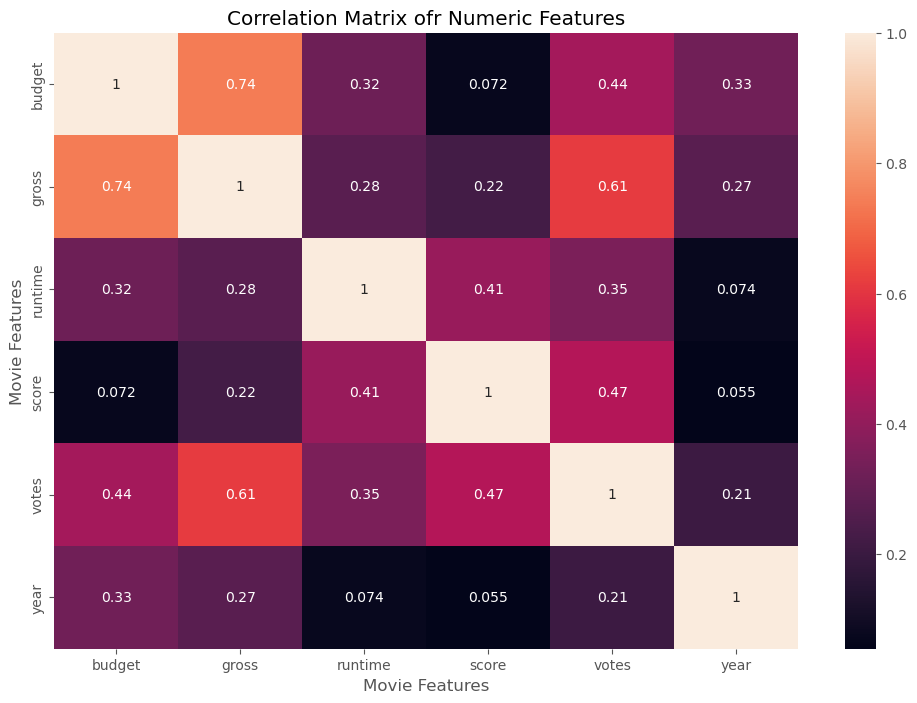

In [39]:
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix ofr Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [40]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime yearcorrect  
5445  2847246203  Twentieth Century Fox    162.0        Dece  
7445  2797501328         Marvel Studios    181.0        Apri  
3045  2201647264  Twentieth Century Fox    194.0        Dece  
6663  2069521700              Lucasfilm    138.0        Dece  
7244  2048359754         Marvel Studios    149.0        Apri

In [41]:
#df_numerized =df



In [44]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df_corrTotal = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')
df_corrTotal

name    rating     genre      year  released     score  \
name         1.000000  0.308719  0.186218  0.266196  0.667802  0.136704   
rating       0.308719  1.000000  0.031875  0.096560  0.236290 -0.074579   
genre        0.186218  0.031875  1.000000  0.074748  0.113826  0.049020   
year         0.266196  0.096560  0.074748  1.000000  0.358793  0.044128   
released     0.667802  0.236290  0.113826  0.358793  1.000000  0.098692   
score        0.136704 -0.074579  0.049020  0.044128  0.098692  1.000000   
votes        0.608592  0.119023  0.177988  0.285813  0.481932  0.248673   
director     0.680281  0.225655  0.132293  0.185075  0.479288  0.176878   
writer       0.763528  0.246759  0.129560  0.229739  0.541143  0.122700   
star         0.601284  0.218276  0.143856  0.239222  0.440012  0.139014   
country      0.124837  0.108129 -0.056457 -0.046607  0.096950 -0.058417   
budget       0.528419  0.274377  0.173006  0.189760  0.399125 -0.006683   
gross        0.986490  0.313734  0.184644  0.276600  0.677864  0.140060   
company      0.632042  0.263213  0.080587  0.134511  0.409398  0.022290   
runtime      0.088441  0.028568  0.011899  0.037832  0.056642  0.056801   
yearcorrect  0.145707  0.086300 -0.005754 -0.026424  0.156973  0.019352   

                votes  director    writer      star   country    budget  \
name         0.608592  0.680281  0.763528  0.601284  0.124837  0.528419   
rating       0.119023  0.225655  0.246759  0.218276  0.108129  0.274377   
genre        0.177988  0.132293  0.129560  0.143856 -0.056457  0.173006   
year         0.285813  0.185075  0.229739  0.239222 -0.046607  0.189760   
released     0.481932  0.479288  0.541143  0.440012  0.096950  0.399125   
score        0.248673  0.176878  0.122700  0.139014 -0.058417 -0.006683   
votes        1.000000  0.473699  0.523163  0.429642  0.013547  0.318387   
director     0.473699  1.000000  0.643213  0.506157  0.121949  0.444053   
writer       0.523163  0.643213  1.000000  0.510510  0.138076  0.449116   
star         0.429642  0.506157  0.510510  1.000000  0.107481  0.460511   
country      0.013547  0.121949  0.138076  0.107481  1.000000  0.114504   
budget       0.318387  0.444053  0.449116  0.460511  0.114504  1.000000   
gross        0.620593  0.693318  0.775945  0.613920  0.124293  0.534452   
company      0.345976  0.527197  0.531137  0.457439  0.178207  0.477554   
runtime      0.087665  0.084415  0.066497  0.095749  0.018683  0.090684   
yearcorrect  0.086864  0.108623  0.110858  0.098730  0.027462  0.073845   

                gross   company   runtime  yearcorrect  
name         0.986490  0.632042  0.088441     0.145707  
rating       0.313734  0.263213  0.028568     0.086300  
genre        0.184644  0.080587  0.011899    -0.005754  
year         0.276600  0.134511  0.037832    -0.026424  
released     0.677864  0.409398  0.056642     0.156973  
score        0.140060  0.022290  0.056801     0.019352  
votes        0.620593  0.345976  0.087665     0.086864  
director     0.693318  0.527197  0.084415     0.108623  
writer       0.775945  0.531137  0.066497     0.110858  
star         0.613920  0.457439  0.095749     0.098730  
country      0.124293  0.178207  0.018683     0.027462  
budget       0.534452  0.477554  0.090684     0.073845  
gross        1.000000  0.637522  0.087448     0.145572  
company      0.637522  1.000000  0.067842     0.069913  
runtime      0.087448  0.067842  1.000000    -0.002895  
yearcorrect  0.145572  0.069913 -0.002895     1.000000

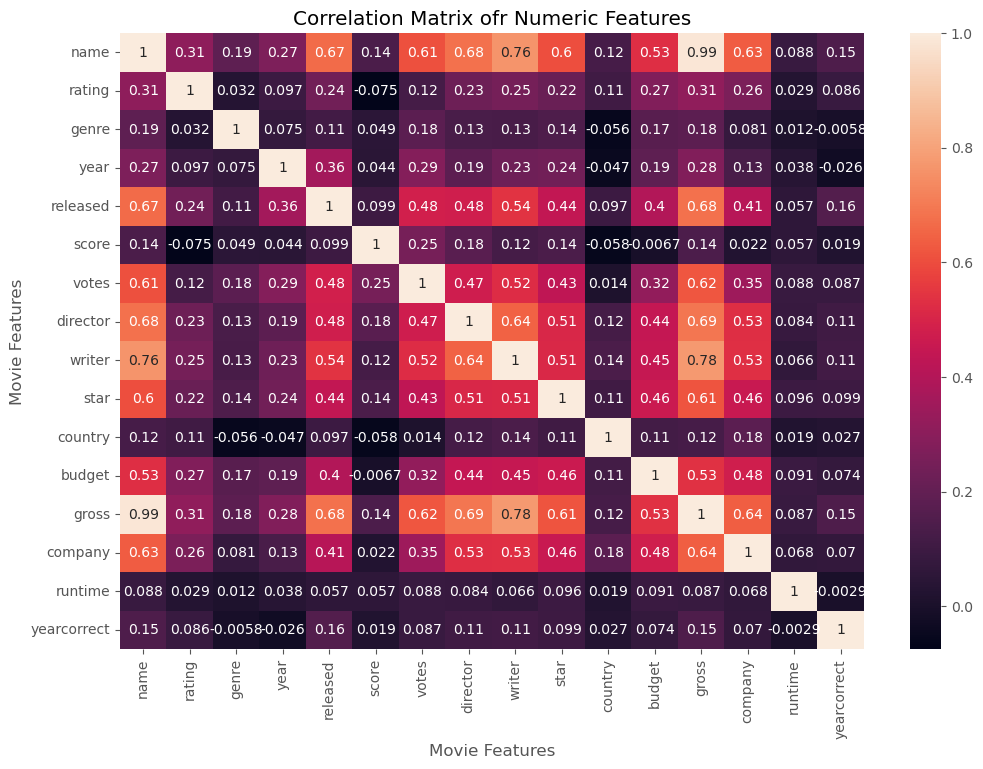

In [45]:
sns.heatmap(df_corrTotal, annot=True)

plt.title('Correlation matrix for Movies')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [46]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name         name           1.000000
             rating         0.308719
             genre          0.186218
             year           0.266196
             released       0.667802
             score          0.136704
             votes          0.608592
             director       0.680281
             writer         0.763528
             star           0.601284
             country        0.124837
             budget         0.528419
             gross          0.986490
             company        0.632042
             runtime        0.088441
             yearcorrect    0.145707
rating       name           0.308719
             rating         1.000000
             genre          0.031875
             year           0.096560
             released       0.236290
             score         -0.074579
             votes          0.119023
             director       0.225655
             writer         0.246759
             star           0.218276
             country        0.108129
 

In [47]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

score        rating        -0.074579
rating       score         -0.074579
score        country       -0.058417
country      score         -0.058417
             genre         -0.056457
genre        country       -0.056457
year         country       -0.046607
country      year          -0.046607
year         yearcorrect   -0.026424
yearcorrect  year          -0.026424
score        budget        -0.006683
budget       score         -0.006683
genre        yearcorrect   -0.005754
yearcorrect  genre         -0.005754
             runtime       -0.002895
runtime      yearcorrect   -0.002895
genre        runtime        0.011899
runtime      genre          0.011899
votes        country        0.013547
country      votes          0.013547
             runtime        0.018683
runtime      country        0.018683
score        yearcorrect    0.019352
yearcorrect  score          0.019352
score        company        0.022290
company      score          0.022290
country      yearcorrect    0.027462
y

In [48]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

director     star           0.506157
star         director       0.506157
writer       star           0.510510
star         writer         0.510510
writer       votes          0.523163
votes        writer         0.523163
director     company        0.527197
company      director       0.527197
name         budget         0.528419
budget       name           0.528419
company      writer         0.531137
writer       company        0.531137
gross        budget         0.534452
budget       gross          0.534452
released     writer         0.541143
writer       released       0.541143
star         name           0.601284
name         star           0.601284
votes        name           0.608592
name         votes          0.608592
gross        star           0.613920
star         gross          0.613920
votes        gross          0.620593
gross        votes          0.620593
company      name           0.632042
name         company        0.632042
company      gross          0.637522
g

In [49]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 54773202654
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19628786232
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64

In [50]:
df['Year'] = df['released'].astype(str).str[:4]
df

name     rating      genre  \
5445                                             Avatar      PG-13     Action   
7445                                  Avengers: Endgame      PG-13     Action   
3045                                            Titanic      PG-13      Drama   
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
2448                                      The Lion King          G  Animation   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
2245                                      Jurassic Park      PG-13     Action   
6908                                       Finding Dory         PG  Animation   
3451          Star Wars: Episode I - The Phantom Menace         PG     Action   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
6311                                    Despicable Me 2         PG  Animation   
6

In [51]:
df.groupby(['company', 'year'])[["gross"]].sum()


gross
company                                            year            
"DIA" Productions GmbH & Co. KG                    2003    44350926
"Weathering With You" Film Partners                2019   193457467
.406 Production                                    1996       10580
1492 Pictures                                      1996   129832389
                                                   1999    87423861
1818 Productions                                   1983    12232628
19 Entertainment                                   2003     4928883
1978 Films                                         2017    40656399
1984 Private Defense Contractors                   2014    58834384
2 Loop Films                                       2002      264349
2.0 Entertainment                                  2019   122810399
2.4.7. Films                                       2007    22783978
2003 Productions                                   2004    69424389
20th Century Studios                               2020   111105497
21 Laps Entertainment                              2014    41296320
                                                   2018    41142379
21st Century Film Corporation                      1990     5835247
21st Century Films                                 1994     1702394
25th Hour Productions                              2002    23932055
26 Films                                           2009    20458873
2929 Productions                                   2007     7248490
                                                   2008    28705178
                                                   2014     5092129
2DUX²                                              2016      678150
                                                   2018   197744377
3 Arts Entertainment                               1996    60209334
                                                   1997    75812433
                                                   2001    71186502
                                                   2010      649626
                                                   2013     3909596
                                                   2014   161459297
                                                   2015    36606743
                                                   2019    22386555
3 Miles Apart Productions Ltd.                     1999     8408835
3311 Productions                                   2017     5042014
360 Pictures                                       2007     9669758
3Mark Entertainment                                2001     4760014
4 Kids Entertainment                               1999   133949270
40 Acres & A Mule Filmworks                        1986     7137502
                                                   1989    37295445
                                                   1995    15403436
                                                   1999    34573780
                                                   2000    27728118
                                                   2004     1526951
4Kids Entertainment                                2007    95802916
7 Arts International                               1999      206128
7 Films Cinéma                                     2000     3033646
88 Productions                                     1990    10005969
888 Productions                                    1990   201965915
900 Films                                          2003     5141166
98 MPH Productions                                 2002    80693537
A Band Apart                                       1995     3734870
                                                   1996       49620
                                                   2002    14946150
A&M Films                                          1984     1455045
                                                   1988      161004
                                                   1992     1526697
                                                  

In [52]:
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2011    3223799224
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2006    2934631933
                       2019    2932757449
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
Columbia Pictures      2011    2738363306
Warner Bros.           2005    2688767210
Name: gross, dtype: int64

In [53]:
CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 54773202654
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19628786232
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64